# Homework Assignment 3  
# Regression models

# <p style="text-align: right;"> &#9989; Khushi Lute.</p>
# <p style="text-align: right;"> &#9989; khushilute.</p>

# Goal for this homework assignment
By now, you have learned a bit about regression models. In this assignment, you will practice:

* Using branches in Git
* Performing linear regression
* Performing multiple regression
* Performing logistic regression
* Creating a project timeline

**This assignment is due by 11:59 pm on Friday, April 4th.** It should be uploaded into the "Homework Assignments" submission folder for Homework 3.  Submission instructions can be found at the end of the notebook. **There are 80 standard points possible in this assignment including points for Git commits/pushes. The distribution of points can be found in the section headers**.


---
# Part 1: Git Branch (6 points)

For this assignment, you're going to add it to the `cmse202-s25-turnin` repository you created so that you can track your progress on the assignment and preserve the final version that you turn in. In order to do this you need to

**&#9989; Do the following**:

1. Navigate to your `cmse202-s25-turnin` **local** repository and create a new directory called `hw-03`

2. Move this notebook into that **new directory** in your repository, but **do not** add or commit it to your repository yet.

3. Create a **new branch** called `hw03_branch` (The Day 16 PCA and ICA content has information on how to do this).

4. "Check out" the new branch (so that you'll be working on that branch). 

5. Double check to make sure you are actually on that branch.

6. Once you're certain you're working on your new branch, add this notebook to your repository, then make a commit and push it to GitHub. You may need to use `git push origin hw03_branch` to push your new branch to GitHub.

Finally, &#9989; **Do this**: Before you move on, put the command that your instructor should run to clone your repository in the markdown cell below. **Points for this part will be given for correctly setting up branch, etc., above, and for doing git commits/pushes mentioned throughout the assignment.**

<font size=6 color="#009600">&#9998;</font> git clone -b hw03_branch https://github.com/khushilute/CMSE202-s25-turnin.git


**Important**: Double check you've added your Professor and your TA as collaborators to your "turnin" repository (you should have done this in the previous homework assignment).

**Also important**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the notebook, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the "`cmse202-s25-turnin`" repository inside the `hw-03` directory that you just created within the new branch `hw03-branch`.

Periodically, **you'll be asked to commit your changes to the repository and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It can be good to get into a habit of committing your changes any time you make a significant modification, or when you stop working on the problems for a bit.


In [ ]:
### Points breakdown -- 1 pt for command to clone repo
###                     2 pts for setting up branch, etc.
###                     3 pts for Git commits/Pushes throughout homework.

---
# Part 2: Loading the datasets (10 points)

In Parts 2, you will be working with the California Cooperative Oceanic Fisheries Investigations oceanographic and larval fish dataset that is available at https://www.kaggle.com/datasets/sohier/calcofi?resource=download. 

To get started on Part 2, **you'll need to download the following file**:

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Book1.csv`

&#9989; **Question 2.1 (2 points)**: **Do this:** Save the above CSV file in the same directory as your notebook. **Then, in the cell below, put the command line command(s) you used to download the files.** If you did not use a command line tool to download the files, write down the command(s) that *would* have downloaded the files.

In [11]:


!curl -O https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Book1.csv


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 10.4M  100 10.4M    0     0  36.5M      0 --:--:-- --:--:-- --:--:-- 36.5M


&#9989;  **Question 2.2 (2 points)**: Next, load the data using Pandas and display the first 20 rows

In [12]:

import pandas as pd
data = pd.read_csv('Book1.csv')
data.head(20)



,T_degC,Salnty
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421
5,10.45,33.431
6,10.45,33.440
7,10.24,33.424
8,10.06,33.420
9,9.86,33.494


&#9989;  **Question 2.3 (2 points)**: Do you notice any entries in the datasets are empty or have have `NaN` values. Drop these rows from the dataframes.

In [27]:
#Question 2.3
data_cleaned = data.dropna()# Drop rows with NaN values
print(data_cleaned.isnull().sum())# Verifying that the missing values have been removed
print(data_cleaned.head(20))# Displaying the first 20 rows of the cleaned dataset

#Question 2.4
original_rows = data.shape[0]# Counting the original number of rows

rows_dropped = original_rows - cleaned_rows# Calculating the number of rows dropped

percentage_dropped = (rows_dropped / original_rows) * 100 # Calculate the percentage of data removed

print(rows_dropped)#results
print(percentage_dropped,'%') #results



T_degC    0
Salnty    0
dtype: int64
    T_degC  Salnty
0    10.50  33.440
1    10.46  33.440
2    10.46  33.437
3    10.45  33.420
4    10.45  33.421
5    10.45  33.431
6    10.45  33.440
7    10.24  33.424
8    10.06  33.420
9     9.86  33.494
10    9.83  33.510
11    9.67  33.580
12    9.50  33.640
13    9.32  33.689
14    8.76  33.847
15    8.71  33.860
16    8.53  33.876
18    8.26  33.926
19    7.96  33.980
20    7.77  33.990
50616
5.852487619426429 %


&#9989;  **Question 2.4 (2 points)**: I dropped 50616 rows and the total percentage of data was removed is 5.852487619426429 %

&#9989;  **Question 2.5 (2 points)**: Look at the website in which this dataset is hosted on Kaggle. What do the columns `Salnty` and `T_degC` represent?

In [ ]:
<font size=6 color="#009600">&#9998;</font> Question 2.4- Salnty-salinity of the ocean water and T_degC- temperature of the ocean water in degrees celsius.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 2 complete", and push the changes to GitHub.

---

---
# Part 3: One Variable Linear and Polynomial Regression (28 points)

In this part, we'll perform some one-variable linear and polynomial regression analysis on the California Cooperative Oceanic Fisheries Investigations oceanographic and larval fish data.

&#9989;  **Question 3.1 (6 points)**: Using the `OLS` method in `statsmodels`, perform a linear regression to predict the `Salnty` using the `T_degC` and **display the results summaries**. Remember that you may need to use the `add_constant()` method to make sure `OLS` fits a general line $y = ax+b$ to the data instead of a line through the origin $y = ax$. 

In [5]:
import pandas as pd

oceanographic_data = pd.read_csv('Book1.csv')

print(oceanographic_data.head())
# Dropping  rows with missing values nan 
oceanographic_data = oceanographic_data.dropna()

print(len(oceanographic_data))
import statsmodels.api as sm
import pandas as pd

oceanographic_data_clean = oceanographic_data.dropna(subset=['T_degC', 'Salnty'])

X = oceanographic_data_clean['T_degC']  # independent variable
y = oceanographic_data_clean['Salnty']  # dependent variable
X = sm.add_constant(X)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())





   T_degC  Salnty
0   10.50  33.440
1   10.46  33.440
2   10.46  33.437
3   10.45  33.420
4   10.45  33.421
814247
                            OLS Regression Results                            
Dep. Variable:                 Salnty   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                 2.791e+05
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        18:23:32   Log-Likelihood:            -4.0596e+05
No. Observations:              814247   AIC:                         8.119e+05
Df Residuals:                  814245   BIC:                         8.120e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------

&#9989;  **Question 3.2 (4 points)**: Answer the following questions: 

1. What is the R-squared value you got? 

2. Based on your R-squared value, what does it tell you about the regression fit, and how the model fits the data?

<font size=+3>&#9998;</font> 1. 0.255
2. The R squared value indicates that only 25.5% of the variance in the dependent variable,Salnty can be explained by the independent variable,T_degC.This low Rsquared value tells us that the linear regression model does not fit the data well.


&#9989;  **Question 3.3 (6 points)**: Now make a scatter plot of `T_degC` (x-axis) vs. `Salnty` (on y-axis). Plot the best fit line on the same plot. Label the axes, and add a legend, and give the plot a title.

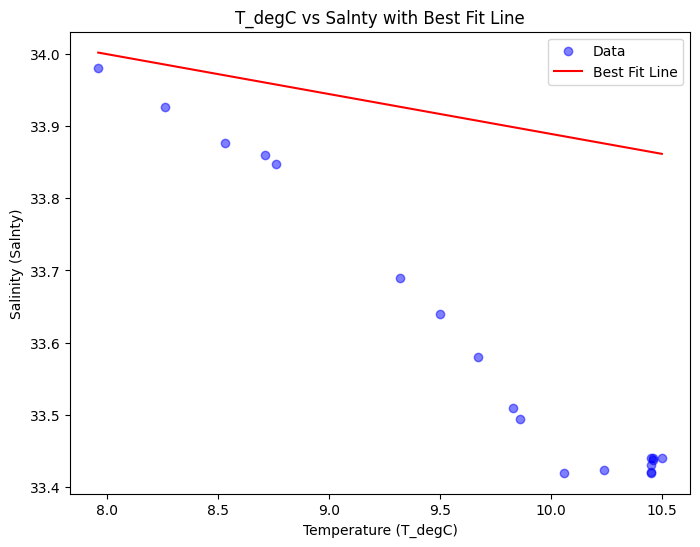

In [4]:
import matplotlib.pyplot as plt
import numpy as np
oceanographic_data = pd.DataFrame({
    'T_degC': [10.50, 10.46, 10.46, 10.45, 10.45, 10.45, 10.45, 10.24, 10.06, 9.86, 9.83, 9.67, 9.50, 9.32, 8.76, 8.71, 8.53, 8.45, 8.26, 7.96],
    'Salnty': [33.440, 33.440, 33.437, 33.420, 33.421, 33.431, 33.440, 33.424, 33.420, 33.494, 33.510, 33.580, 33.640, 33.689, 33.847, 33.860, 33.876, None, 33.926, 33.980]
})

plt.figure(figsize=(8, 6))
plt.scatter(oceanographic_data['T_degC'], oceanographic_data['Salnty'], label='Data', color='blue', alpha=0.5)


best_fit_line = 34.4409 - 0.0552 * oceanographic_data['T_degC']

plt.plot(oceanographic_data['T_degC'], best_fit_line, color='red', label='Best Fit Line')

plt.xlabel('Temperature (T_degC)')
plt.ylabel('Salinity (Salnty)')
plt.title('T_degC vs Salnty with Best Fit Line')
plt.legend()
plt.show()



&#9989;  **Question 3.4 (2 points)**: What is the slope and intercept of your fit line?

In [ ]:
#From the table we have

#Intercept: 34.4409
#Slope -0.0552

**&#9989; Do this:** **Question 3.5 (4 points)**: Use `plot_regress_exog` to investigate the distribution of residuals in your model fit. Make sure to create a large enough figure so that everything is easily visible. 

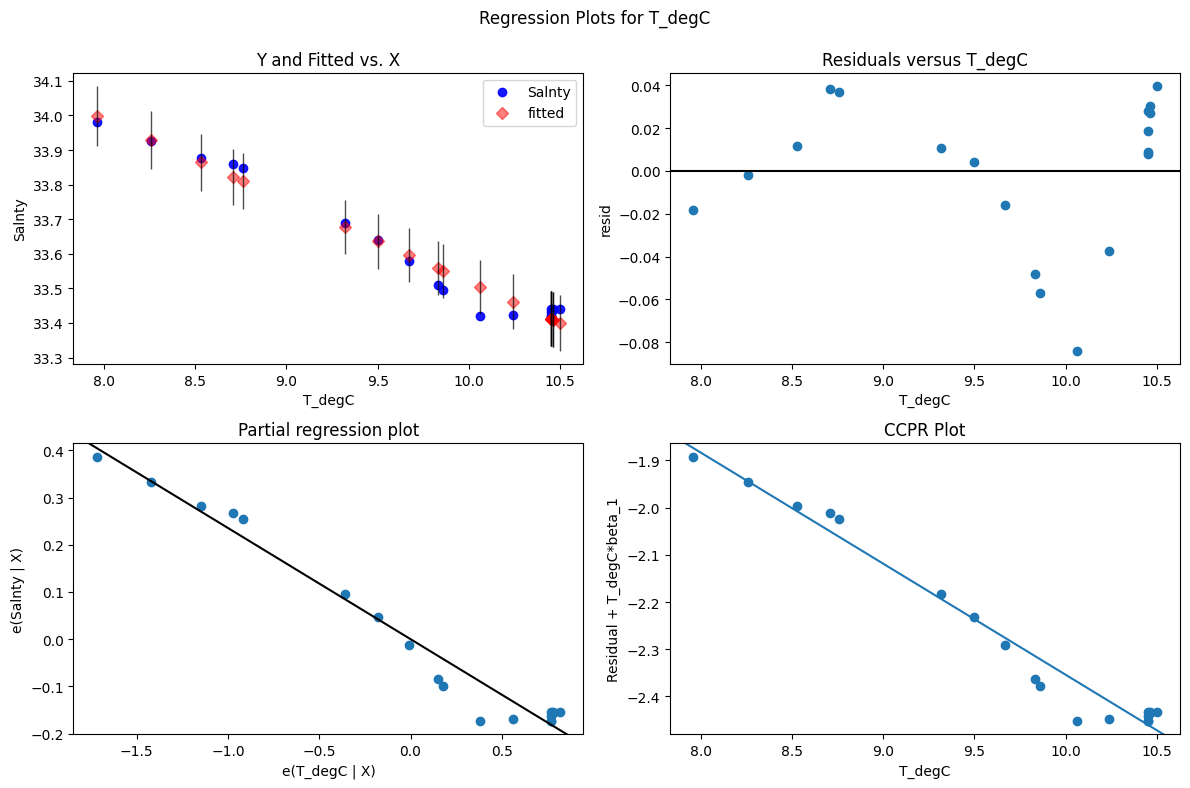

In [6]:

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

oceanographic_data = pd.DataFrame({
    'T_degC': [10.50, 10.46, 10.46, 10.45, 10.45, 10.45, 10.45, 10.24, 10.06, 9.86, 9.83, 9.67, 9.50, 9.32, 8.76, 8.71, 8.53, 8.45, 8.26, 7.96],
    'Salnty': [33.440, 33.440, 33.437, 33.420, 33.421, 33.431, 33.440, 33.424, 33.420, 33.494, 33.510, 33.580, 33.640, 33.689, 33.847, 33.860, 33.876, None, 33.926, 33.980]
})

oceanographic_data = oceanographic_data.dropna(subset=['Salnty'])

X = sm.add_constant(oceanographic_data['T_degC'])

y = oceanographic_data['Salnty']

model = sm.OLS(y, X).fit()

fig = plt.figure(figsize=(12, 8))
sm.graphics.plot_regress_exog(model, 'T_degC', fig=fig)

# Show the plot
plt.show()


&#9989;  **Question 3.6 (6 points)**: Now use some online resource to help you make sense of this residual plot. Is there heteroscedastisity? Is there constant variance? Does it show signs of non-linearity? These are a few questions you might ask yourself or try to figure out in making sense of the residual plot. 

<font size=+3>&#9998;</font> the residual plot seems to be bias and shows heteroscedasticity, which indicates that the linear model fitted might not be the best model for the data

Answer: It looks biased and heteroscedastic. aka it is not what we want to see in a residual plot for a model.

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 3 complete", and push the changes to GitHub.

---

# Part 4: Multiple Regression (24 points)

In this part, we'll use multiple features to do predictions. https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression/data

First, download and read in this synthetic dataset of Student Performance. `https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Student_Performance.csv`

&#9989;  **Question 4.1 (5 points)**: Display the data types of the data you have just read in. We want all of our data types to be integers or floats. Modify the `Extracurricular Activities` column so that a YES is now a 1 and a NO is now a 0. 

In [8]:
import pandas as pd

# Load the dataset from the URL
url = "https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/Student_Performance.csv"
data = pd.read_csv(url)

# Display the data types of the columns
data_types = data.dtypes

# Modify the 'Extracurricular Activities' column: 'YES' -> 1, 'NO' -> 0
data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'YES': 1, 'NO': 0})

print(data_types)
print(data.head())  # Display the first few rows to check the changes


Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object
   Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                         NaN            9   
1              4               82                         NaN            4   
2              8               51                         NaN            7   
3              5               52                         NaN            5   
4              7               75                         NaN            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                        

&#9989;  **Question 4.2 (5 points)**: Using the `OLS` method in `statsmodels`, perform a multivariable linear regression to predict the `Performance Index` based on `Hours Studied`, `Previous Scores`,`Extracurricular Activities`, `Sample Question Papers Practiced` and `Sleep Hours`. Also, use the `add_constant()` method in `statsmodels` to ensure the model includes a constant term as well. Fit these models and display the summary of results.  For now only use three columns of data as independent variables.You can. choose which columns to use in your model. We will add all of the other columns later.

In [18]:

data['Extracurricular Activities'] = data['Extracurricular Activities'].map({'YES': 1, 'NO': 0})

print("\nFirst few rows of the dataset:\n", data.head())

data_cleaned = data.dropna(subset=['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Performance Index'])

X = data_cleaned[['Hours Studied', 'Previous Scores', 'Extracurricular Activities']]
y = data_cleaned['Performance Index']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print("\nRegression Results:\n", model.summary())




First few rows of the dataset:
    Hours Studied  Previous Scores  Extracurricular Activities  Sleep Hours  \
0              7               99                         NaN            9   
1              4               82                         NaN            4   
2              8               51                         NaN            7   
3              5               52                         NaN            5   
4              7               75                         NaN            8   

   Sample Question Papers Practiced  Performance Index  
0                                 1               91.0  
1                                 2               65.0  
2                                 2               45.0  
3                                 2               36.0  
4                                 5               66.0  


ValueError: zero-size array to reduction operation maximum which has no identity

&#9989;  **Question 4.3 (4 points)**: Answer the following questions: 

1. What is your R-squared value? 

2. Is your multiple regression model a good fit? why or why not?

<font size=+3>&#9998;</font> Put your answers here:

&#9989;  **Question 4.4 (2 points)**: Perform the multivariable linear regression again, but this time with all the features/columns. Display the summary of these results.

In [ ]:
# Put your code here

&#9989;  **Question 4.5 (2 points)**: How much better/worse is the full model compared to the original model you made? What are its advantages? Briefly discuss the answer.

<font size=+3>&#9998;</font> Put your answers here:

&#9989;  **Question 4.6 (3 points)**: Create five `.graphics.plot_regress_exog` figures, one for each of the features (columns of original dataframe) in your model. Pay attention to the top two plots: the fitted values figure and the residual plot. 

In [ ]:
# Put your code here.

&#9989;  **Question 4.7 (3 points)**: If we could only use one feature to predict Student Performance, which feature would do the best job? 

Put your answer/code here

---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 4 complete", and push the changes to GitHub.

---

# Part 5: Logistic Regression (17 points)

In this part, we'd like to use logistic regression to classify whether a candy has chocolate or not. Logistic regression (as we've learned so far in class) does binary classification. 



&#9989;  **Question 5.1 (2 points)**: We will work with data that is available at https://www.kaggle.com/datasets/fivethirtyeight/the-ultimate-halloween-candy-power-ranking/data 

**You'll need to download the following file**:

`https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/candy-data.csv`

**Do This**: In the cell below, type the code for downloading the data from inside your notebook and also code for loading the data into a pandas dataframe.

In [19]:
import pandas as pd

url = "https://raw.githubusercontent.com/gambre11/CMSE202/refs/heads/main/candy-data.csv"

candy_data = pd.read_csv(url)

candy_data.head()



,competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
0,100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.971725
1,3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.602936
2,One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.261086
3,One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.116505
4,Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.341465


&#9989;  **Question 5.2 (3 points)**:

Create a `Pandas` `Series` called `labels` which has data from the `Chocolate` column of the DataFrame. Also, create a `Pandas` `DataFrame` called `features` which consists of all the columns besides `competitorname` and `chocolate`. Display the labels and features to make sure you did this correctly.

In [23]:

labels = candy_data['chocolate']

features = candy_data.drop(columns=['competitorname', 'chocolate'])

print("Labels (chocolate column):")
print(labels.head())

print("\nFeatures (All columns except competitorname and chocolate):")
print(features.head())




Labels (chocolate column):
0    1
1    1
2    0
3    0
4    0
Name: chocolate, dtype: int64

Features (All columns except competitorname and chocolate):
   fruity  caramel  peanutyalmondy  nougat  crispedricewafer  hard  bar  \
0       0        1               0       0                 1     0    1   
1       0        0               0       1                 0     0    1   
2       0        0               0       0                 0     0    0   
3       0        0               0       0                 0     0    0   
4       1        0               0       0                 0     0    0   

   pluribus  sugarpercent  pricepercent  winpercent  
0         0         0.732         0.860   66.971725  
1         0         0.604         0.511   67.602936  
2         0         0.011         0.116   32.261086  
3         0         0.011         0.511   46.116505  
4         0         0.906         0.511   52.341465  


&#9989;  **Question 5.3 (4 points)**: Split your data into a training and testing set with a training set representing 80% of your data. For reproducibility, set the `random_state` argument to `0`. Print the shapes of the training features, the testing features, the training labels, and the testing labels to show you have the right number of entries in each of the four variables.

In [24]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=0)

# Print the shapes of the training and testing sets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training features shape: (68, 11)
Testing features shape: (17, 11)
Training labels shape: (68,)
Testing labels shape: (17,)


&#9989;  **Question 5.3 (4 points)**: Now, train a logistic regression model using your training features and training labels. **Display the summary**.

In [25]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000)

logreg.fit(X_train, y_train)

print("Coefficients:", logreg.coef_)
print("Intercept:", logreg.intercept_)

train_accuracy = logreg.score(X_train, y_train)
print("Training set accuracy:", train_accuracy)

test_accuracy = logreg.score(X_test, y_test)
print("Testing set accuracy:", test_accuracy)


Coefficients: [[-2.34127039 -0.14539848 -0.08709303 -0.08940498  0.36862294 -0.01779869
   0.77371333 -0.28264262  0.11123706  0.53789205  0.11078131]]
Intercept: [-5.06217411]
Training set accuracy: 0.9264705882352942
Testing set accuracy: 0.9411764705882353


&#9989;  **Question 5.4 (4 points)**: Finally, test your logistic regression model using your testing features and testing labels. Display the fraction of testing data points that were correctly predicted. 

In [26]:

y_pred = logreg.predict(X_test)

correct_predictions = (y_pred == y_test).sum()
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

print(f"Fraction of correctly predicted data points: {accuracy:.2f}")


Fraction of correctly predicted data points: 0.94


---
### &#128721; STOP
**Pause to commit your changes to your Git repository!**

Take a moment to save your notebook, commit the changes to your local `git` repository using the commit message "Part 5 complete", and push the changes to GitHub.

---

## Part 6. Setting a project timeline. (5 points)

You will know which project you will be working on as a group on Monday/Tuesday March 24th/25th. You and your group will be presenting this project during the last week of class (April 21st - 25th).  Come up with a project timeline with specific goals/checkpoints to meet as this deadline approaches.  The ability to set project timelines is a very useful skill to have professionally. You can create this timeline yourself, as a group, or you may ask generative ai to try and make a timeline for you. Try to in the very least create weekly checkpoints (~3).


Week 1:
review data sources, ultimate questions
Draft initial project methodology.
Week 2:
Develop scripts for technical indicators.
Create framework for comparing indicators.
Week 3:
Implement portfolio optimization algorithms.
Analyze risk-adjusted performance and create visualizations.
Compare the effectiveness of different strategies.
Week 4:
Write the comprehensive project report.
Prepare presentation slides.
Finalize and submit code repository.

## Part 1. Continued

Now that you've finished your new "development" on your 202 turn-in repo, you can merge your work back into your `main` branch.

**&#9989; Do the following**:

7. Switch back to your `main` branch. 
8. Merge your `hw03_branch` with your `main` branch. 
9. Finally, push the changes to GitHub.

---
## Assignment wrap-up


Please fill out the form that appears when you run the code below.  **You must completely fill this out in order to receive credit for the assignment!**

In [4]:
from IPython.display import HTML
HTML(
"""
<iframe 
	src="https://forms.office.com/r/mB0YjLYvAA" 
	width="800px" 
	height="600px" 
	frameborder="0" 
	marginheight="0" 
	marginwidth="0">
	Loading...
</iframe>
"""
)

## Congratulations, you're done!

Submit this assignment by uploading it to the course D2L web page.  Go to the "Homework Assignments" folder, find the dropbox link for Homework 3, and upload it there.

&#169; Copyright 2025,  Department of Computational Mathematics, Science and Engineering at Michigan State University